**Description of Basic Responses to COVID In Terms of Travel Patterns (National, Extra Interesting Descriptive)**
Owner: Etienne, Gus

1) Plot 1: Scatter Plot (Points = States, X-Axis = Travel Volume, Y-Axis = Cases)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


path = "output_data/consolidated_new.csv"
covid_df = pd.read_csv(path)
covid_df

#Subset the data for the California state by selectin state that has the code "CA"
CA_COVID_1 = covid_df[covid_df['state']== "CA"]

#Remove any row that has zero total cases, this will mark when Covid Happened
CA_COVID_2 = CA_COVID_1[CA_COVID_1['tot_cases']!= 0]


# Adding lag to the number of people people staying home after the dead is reported
CA_COVID_2['Population_Staying_at_Home_1days'] = CA_COVID_2['Population Staying at Home'].shift(periods=1)
CA_COVID_2['Population_Staying_at_Home_3days'] = CA_COVID_2['Population Staying at Home'].shift(periods=3)
CA_COVID_2['Population_Staying_at_Home_5days'] = CA_COVID_2['Population Staying at Home'].shift(periods=5)
CA_COVID_2['Population_Staying_at_Home_7days'] = CA_COVID_2['Population Staying at Home'].shift(periods=7)
CA_COVID_2['Population_Staying_at_Home_9days'] = CA_COVID_2['Population Staying at Home'].shift(periods=9)
CA_COVID_2['Population_Staying_at_Home_11days'] = CA_COVID_2['Population Staying at Home'].shift(periods=11)
CA_COVID_2['Population_Staying_at_Home_13days'] = CA_COVID_2['Population Staying at Home'].shift(periods=13)

CA_COVID_3 = CA_COVID_2[CA_COVID_2['new_death']>0]
CA_COVID_4 = CA_COVID_3.dropna()


<ipython-input-1-7c5455406da9>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_COVID_2['Population_Staying_at_Home_1days'] = CA_COVID_2['Population Staying at Home'].shift(periods=1)
<ipython-input-1-7c5455406da9>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_COVID_2['Population_Staying_at_Home_3days'] = CA_COVID_2['Population Staying at Home'].shift(periods=3)
<ipython-input-1-7c5455406da9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

1. Determine the number of day after Case or Death Reporting that affect the number of people staying at home.
2. Determine whether "New Case" or "New Death" has more impact on the population staying at home.

In [2]:
#running the Pearson R value to check which lag days has the strongest correlation between number of death report and number of people staying at home x days after reporting.

correlation_CA_1 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_1days'])
correlation_CA_3 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_3days'])
correlation_CA_5 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_5days'])
correlation_CA_7 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_7days'])
correlation_CA_9 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_9days'])
correlation_CA_11 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_11days'])
correlation_CA_13 = st.pearsonr(CA_COVID_4['new_death'],CA_COVID_4['Population_Staying_at_Home_13days'])

correlation_CA_1_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_1days'])
correlation_CA_3_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_3days'])
correlation_CA_5_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_5days'])
correlation_CA_7_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_7days'])
correlation_CA_9_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_9days'])
correlation_CA_11_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_11days'])
correlation_CA_13_Case = st.pearsonr(CA_COVID_4['new_case'],CA_COVID_4['Population_Staying_at_Home_13days'])

CA_C1 = round(correlation_CA_1_Case[0],4)
CA_C3 = round(correlation_CA_3_Case[0],4)
CA_C5 = round(correlation_CA_5_Case[0],4)
CA_C7 = round(correlation_CA_7_Case[0],4)
CA_C9 = round(correlation_CA_9_Case[0],4)
CA_C11 = round(correlation_CA_11_Case[0],4)
CA_C13 = round(correlation_CA_13_Case[0],4)

CA_D1 = round(correlation_CA_1[0],4)
CA_D3 = round(correlation_CA_3[0],4)
CA_D5 = round(correlation_CA_5[0],4)
CA_D7 = round(correlation_CA_7[0],4)
CA_D9 = round(correlation_CA_9[0],4)
CA_D11 = round(correlation_CA_11[0],4)
CA_D13 = round(correlation_CA_13[0],4)

R_Test_list = ["1 day", CA_C1, CA_D1],["3 days", CA_C3, CA_D3],["5 days", CA_C5, CA_D5],["7 days", CA_C7, CA_D7],["9 days", CA_C9, CA_D9], ["11 days", CA_C11, CA_D11],["13 days", CA_C13, CA_D13]
R_Test_Table = pd.DataFrame(R_Test_list, columns =['Number of day after Reporting','Pearson R - New Case', 'Pearson R - New Death'])
R_Test_Table

,Number of day after Reporting,Pearson R - New Case,Pearson R - New Death
0,1 day,0.5269,0.4284
1,3 days,0.5100,0.5005
2,5 days,0.5340,0.5303
3,7 days,0.5114,0.4962
4,9 days,0.5036,0.4933
5,11 days,0.5042,0.5827
6,13 days,0.4924,0.5424


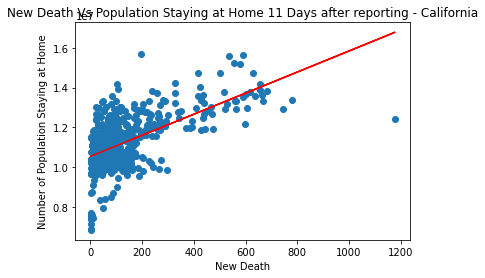

Regression is y = 5310.13x + 10536762.07


In [3]:
# Based on a the Pearson R value displayed in the table, 11 days lag after new death is reported seems to have the strongest correlation. We will select Death 11 days lag as a the number for other other state calculation

x_values = CA_COVID_4["new_death"]
y_values = CA_COVID_4["Population_Staying_at_Home_11days"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_TX = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("New Death Vs Population Staying at Home 11 Days after reporting - California")
plt.xlabel("New Death")
plt.ylabel("Number of Population Staying at Home")
plt.show()
print(f'Regression is {line_eq_TX}')

In [4]:
#prepare the data for the four other largest state, first by subsetting the data and removing NaN value

TX_COVID_df = covid_df[covid_df['state']== "TX"]
TX_COVID_df_1 = TX_COVID_df[TX_COVID_df['tot_cases']!= 0]
TX_COVID_df_2 = TX_COVID_df_1[TX_COVID_df_1['new_death']> 0]
TX_COVID_df_2['Population_Staying_at_Home_11days'] = TX_COVID_df_2['Population Staying at Home'].shift(periods=11)
TX_COVID_df_3 = TX_COVID_df_2.dropna()

NY_COVID_df = covid_df[covid_df['state']== "NY"]
NY_COVID_df_1 = NY_COVID_df[NY_COVID_df['tot_cases']!= 0]
NY_COVID_df_2 = NY_COVID_df_1[NY_COVID_df_1['new_death']> 0]
NY_COVID_df_2['Population_Staying_at_Home_11days'] = NY_COVID_df_2['Population Staying at Home'].shift(periods=11)
NY_COVID_df_3 = NY_COVID_df_2.dropna()

IL_COVID_df = covid_df[covid_df['state']== "IL"]
IL_COVID_df_1 = IL_COVID_df[IL_COVID_df['tot_cases']!= 0]
IL_COVID_df_2 = IL_COVID_df_1[IL_COVID_df_1['new_death']> 0]
IL_COVID_df_2['Population_Staying_at_Home_11days'] = IL_COVID_df_2['Population Staying at Home'].shift(periods=11)
IL_COVID_df_3 = IL_COVID_df_2.dropna()

FL_COVID_df = covid_df[covid_df['state']== "FL"]
FL_COVID_df_1 = FL_COVID_df[FL_COVID_df['tot_cases']!= 0]
FL_COVID_df_2 = FL_COVID_df_1[FL_COVID_df_1['new_death']> 0]
FL_COVID_df_2['Population_Staying_at_Home_11days'] = FL_COVID_df_2['Population Staying at Home'].shift(periods=11)
FL_COVID_df_3 = FL_COVID_df_2.dropna()

<ipython-input-4-526ce29f0835>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TX_COVID_df_2['Population_Staying_at_Home_11days'] = TX_COVID_df_2['Population Staying at Home'].shift(periods=11)
<ipython-input-4-526ce29f0835>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_COVID_df_2['Population_Staying_at_Home_11days'] = NY_COVID_df_2['Population Staying at Home'].shift(periods=11)
<ipython-input-4-526ce29f0835>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

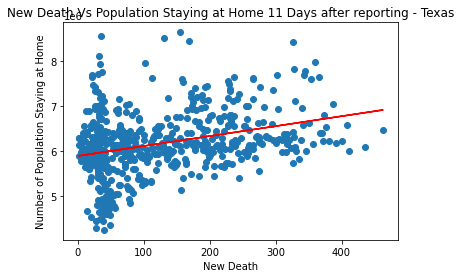

Regression is y = 2216.75x + 5892279.14


In [5]:
#Scatter Plot and Pearson R - Texas
x_values = TX_COVID_df_3["new_death"]
y_values = TX_COVID_df_3["Population_Staying_at_Home_11days"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_TX = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("New Death Vs Population Staying at Home 11 Days after reporting - Texas")
plt.xlabel("New Death")
plt.ylabel("Number of Population Staying at Home")
plt.show()
print(f'Regression is {line_eq_TX}')

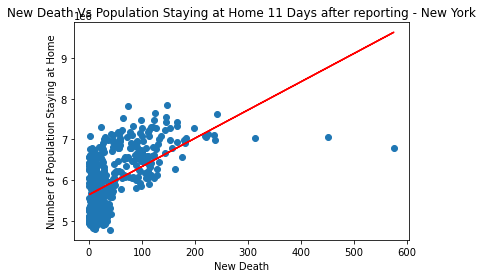

Regression is y = 6952.4x + 5639832.25


In [6]:
#Scatter Plot and Pearson R - New York
x_values = NY_COVID_df_3["new_death"]
y_values = NY_COVID_df_3["Population_Staying_at_Home_11days"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_NY = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("New Death Vs Population Staying at Home 11 Days after reporting - New York")
plt.xlabel("New Death")
plt.ylabel("Number of Population Staying at Home")
plt.show()
print(f'Regression is {line_eq_NY}')

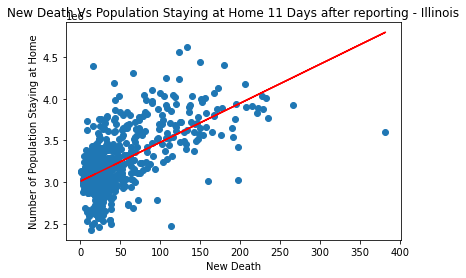

Regression is y = 4683.96x + 3008943.4


In [7]:
#Scatter Plot and Pearson R - Illinois
x_values = IL_COVID_df_3["new_death"]
y_values = IL_COVID_df_3["Population_Staying_at_Home_11days"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_IL = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("New Death Vs Population Staying at Home 11 Days after reporting - Illinois")
plt.xlabel("New Death")
plt.ylabel("Number of Population Staying at Home")
plt.show()
print(f'Regression is {line_eq_IL}')

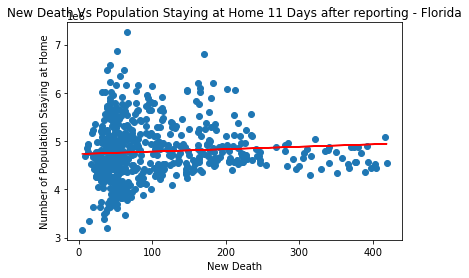

Regression is y = 501.95x + 4732408.67


In [8]:
#Scatter Plot and Pearson R - Florida
x_values = FL_COVID_df_3["new_death"]
y_values = FL_COVID_df_3["Population_Staying_at_Home_11days"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq_FL = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("New Death Vs Population Staying at Home 11 Days after reporting - Florida")
plt.xlabel("New Death")
plt.ylabel("Number of Population Staying at Home")
plt.show()
print(f'Regression is {line_eq_FL}')

3.Show the difference between the correlation between death report and Population Staying at Home by State.

In [9]:
#putting the calculated Pearson R value into table for comparison

correlation_FL = st.pearsonr(FL_COVID_df_3['new_death'],FL_COVID_df_3['Population_Staying_at_Home_11days'])
correlation_TX = st.pearsonr(TX_COVID_df_3['new_death'],TX_COVID_df_3['Population_Staying_at_Home_11days'])
correlation_IL = st.pearsonr(IL_COVID_df_3['new_death'],IL_COVID_df_3['Population_Staying_at_Home_11days'])
correlation_NY = st.pearsonr(NY_COVID_df_3['new_death'],NY_COVID_df_3['Population_Staying_at_Home_11days'])

CA_R = round(correlation_CA_11[0],4)
TX_R = round(correlation_TX[0],4)
IL_R = round(correlation_IL[0],4)
FL_R = round(correlation_FL[0],4)
NY_R = round(correlation_NY[0],4)


R_list = [['California', CA_R], ['Illinois', IL_R], ['Florida', FL_R], ['New York', NY_R], ['Texas', TX_R]]
R_Table = pd.DataFrame(R_list, columns =['State', 'Pearson-R Value'])
R_Table_Sorted = R_Table.sort_values(["Pearson-R Value"], ascending=False)
R_Table_Sorted

,State,Pearson-R Value
1,Illinois,0.6186
0,California,0.5827
3,New York,0.5164
4,Texas,0.3206
2,Florida,0.0725
